In [5]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
boston = load_boston()
print(boston.keys())
print(boston['DESCR'])

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highway

D:\liuchaochao\DownLoad\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing da

In [6]:
X, y = boston.data, boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=8)
print(X_train.shape)
print(X_test.shape)

(379, 13)
(127, 13)


In [7]:
from sklearn.svm import SVR
for kernel in ['linear','rbf']:
    svr = SVR(kernel=kernel)
    svr.fit(X_train, y_train)
    print(kernel,'核函数的模型训练集得分：{:.3f}'.format(
        svr.score(X_train, y_train)))
    print(kernel,'核函数的模型测试集得分：{:.3f}'.format(
        svr.score(X_test, y_test)))

linear 核函数的模型训练集得分：0.709
linear 核函数的模型测试集得分：0.696
rbf 核函数的模型训练集得分：0.192
rbf 核函数的模型测试集得分：0.222


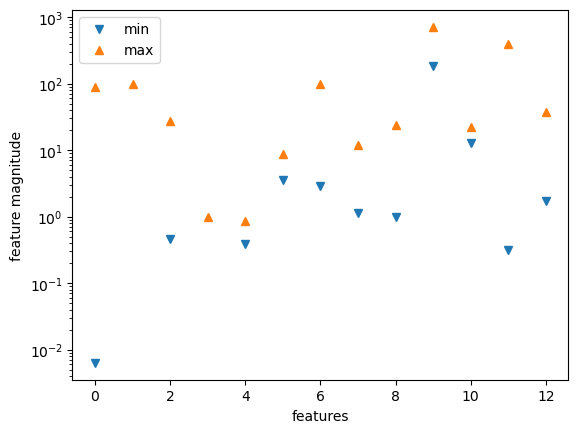

In [8]:
plt.plot(X.min(axis=0),'v',label='min')
plt.plot(X.max(axis=0),'^',label='max')
plt.yscale('log')
plt.legend(loc='best')
plt.xlabel('features')
plt.ylabel('feature magnitude')
plt.show()

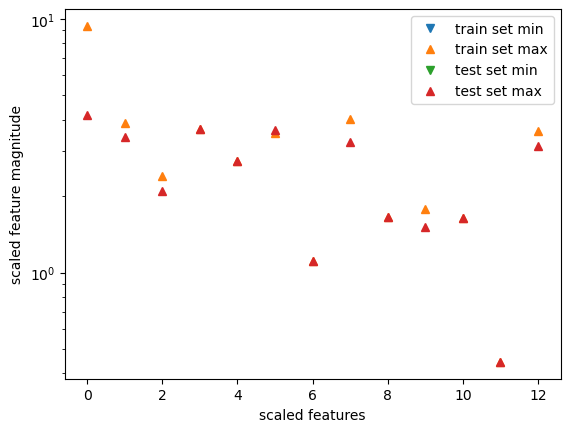

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
plt.plot(X_train_scaled.min(axis=0),'v',label='train set min')
plt.plot(X_train_scaled.max(axis=0),'^',label='train set max')
plt.plot(X_test_scaled.min(axis=0),'v',label='test set min')
plt.plot(X_test_scaled.max(axis=0),'^',label='test set max')
plt.yscale('log')
plt.legend(loc='best')
plt.xlabel('scaled features')
plt.ylabel('scaled feature magnitude')
plt.show()

In [10]:
for kernel in ['linear','rbf']:
    svr = SVR(kernel=kernel)
    svr.fit(X_train_scaled, y_train)
    print('数据预处理后',kernel,'核函数的模型训练集得分：{:.3f}'.format(
        svr.score(X_train_scaled, y_train)))
    print('数据预处理后',kernel,'核函数的模型测试集得分：{:.3f}'.format(
        svr.score(X_test_scaled, y_test)))

数据预处理后 linear 核函数的模型训练集得分：0.706
数据预处理后 linear 核函数的模型测试集得分：0.698
数据预处理后 rbf 核函数的模型训练集得分：0.665
数据预处理后 rbf 核函数的模型测试集得分：0.695


In [11]:
svr = SVR(C=100, gamma=0.1)
svr.fit(X_train_scaled, y_train)
print('调节参数后的模型在训练集得分：{:.3f}'.format(
        svr.score(X_train_scaled, y_train)))
print('调节参数后的模型在测试集得分：{:.3f}'.format(
        svr.score(X_test_scaled, y_test)))

调节参数后的模型在训练集得分：0.966
调节参数后的模型在测试集得分：0.894
